<a href="https://colab.research.google.com/github/ufrpe-ia/ia-2019-2-exercicio-eight-queens-thiagocossta/blob/master/Copy_of_ia_exercicio_eight_queens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício: Solucionando o problema das 8 rainhas
## Solução 1: força bruta!

Varrendo cada linha do tabuleiro e colocando uma rainha por coluna, enquanto checamos a cada passo que duas rainhas não estão na linha de ataque da outra. 

Dessa forma, a solução avaliará todas as combinações possíveis das oito rainhas no tabuleiro de xadrez e rejeitará os estados inválidos. Quantas combinações de 8 rainhas em um tabuleiro de 64 células são possíveis?

A fórmula de combinações é dada por:

$C(n,k) = \frac{n!}{k!\cdot(n-k)!}$

Considerando um tabuleiro de 8 x 8, teríamos:

$C(64,8) = \frac{64!}{8!\cdot(64-8)!} = 4.426.165.368$ soluções possíveis a serem avaliadas. 

Considerando que este é um problema que pode ser usado para representar outros 
[problemas](https://pdfs.semanticscholar.org/79d2/fa13d4a5cfc02ff6936b6083bb620e4e0ce1.pdf) (reais, e.g., VLSI design) 
que eventualmente pode ter dimensões muito superiores às de um tabuleiro de xadrez, vale a pena analisar como se dá o 
crescimento deste problema em termos da entrada.

### Questão 1
Gere um gráfico (utilize o matplotlib) que demonstre a taxa de crescimento da quantidade de soluções possíveis em termos do tamanho do tabuleiro, conforme apresentado acima.

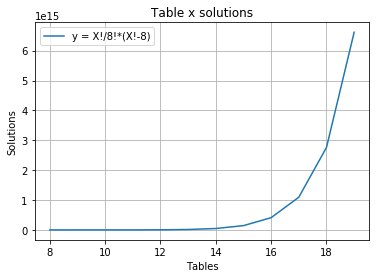

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# quantidade de soluções relativas ao tamanho do tabuleiro
def solutionBySize(size):
    boardTitle = size * size
    return np.math.factorial(boardTitle)/(np.math.factorial(8)*np.math.factorial((boardTitle-8)))

MAX_TABLE_SIZE = 20

# criando de pontos no gráfico
x = range(8, MAX_TABLE_SIZE)
func = lambda x: solutionBySize(x)
vfunc = np.vectorize(func)
y = vfunc(x)   

# criação e plot do gráfico
plt.plot(x, y)
plt.xlabel("Tables")
plt.ylabel("Solutions")
plt.title("Table x solutions")
plt.grid(True)
plt.legend(['y = X!/8!*(X!-8)'])
plt.show()

## Modelando o problema em Python

In [0]:
"""The n queens puzzle"""
class NQueens:
    def __init__(self, size):
        # Store the puzzle (problem) size and the number of valid solutions
        self.size = size
        self.solutions = 0

    def solve(self):
        return []

    def show(self, solution=None):
        """Show the full NxN board"""
        for row in range(self.size):
            line = ""
            for column in range(self.size):
                if solution and solution[row] == column:
                    line += "Q "
                else:
                    line += ". "
            print(line)
        print("\n")
       
# Criando uma instância do problema
board = NQueens(8)
board.show()

. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 




### Questão 2
Implemente a seguinte formulação:

- estados: qualquer disposição com n (n ≤ 8) rainhas
- operadores: adicionar uma rainha a qualquer quadrado
- Verificar se a solução é válida ao final da 'alocação'
- 64x63x...x57 = 3x1014 possibilidades

### Questão 3
Implemente a seguinte formulação:

- estados: disposição com n (n ≤ 8) rainhas sem ataque mútuo (teste gradual)
- operadores: adicionar uma rainha na coluna vazia mais à esquerda em que não possa ser atacada
- 2057 possibilidades (podendo ficar sem opções de escolha dependendo das operações anteriores)

### Questão 4
Implemente a seguinte formulação:
- estados: disposição com 8 rainhas, uma em cada coluna
- operadores: mover uma rainha atacada para outra casa na mesma coluna